# Extreme Fill 2D Example

In [1]:
from extremefill2D.fextreme import init_sim

In [2]:
dd = init_sim('scripts/params.json', tags=['tag1', 'tag2'], a_parameter=3)

In [3]:
dd.leaves

<View([<Leaf: 'data/a839d068-c19b-4122-bd3a-56a3b76a5350/Treant.a839d068-c19b-4122-bd3a-56a3b76a5350.json'>, <Leaf: 'data/a839d068-c19b-4122-bd3a-56a3b76a5350/data0.nc'>, <Leaf: 'data/a839d068-c19b-4122-bd3a-56a3b76a5350/params.json'>])>

'a839d068-c19b-4122-bd3a-56a3b76a5350'

In [9]:
ll

<Leaf: 'data/1e1e7ee4-49b4-4bbd-ad5f-54d047833b2e/data0.nc'>

In [10]:
import xarray
data = xarray.open_dataset(ll.abspath)

In [11]:
data

<xarray.Dataset>
Dimensions:             (cupric: 5510, distance: 5510, potential: 5510, suppressor: 5510, theta: 5510)
Coordinates:
  * potential           (potential) float64 0.25 0.25 0.25 0.25 0.25 0.25 ...
  * distance            (distance) float64 -5.361e-06 -5.041e-06 -4.756e-06 ...
  * theta               (theta) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
  * cupric              (cupric) float64 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 ...
  * suppressor          (suppressor) float64 0.02 0.02 0.02 0.02 0.02 0.02 ...
Data variables:
    time_step_duration  float64 0.01
    elapsed_time        float64 0.0

In [37]:
import numpy as np
aa = np.zeros(5510, 'd')
aa[:] = data['distance']
print(aa)

[ -5.36060042e-06  -5.04077690e-06  -4.75641866e-06 ...,   2.04400000e-05
   2.04400000e-05   2.04400000e-05]


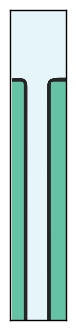

In [2]:
_ = main('scripts/params.json', totalSteps=300, data_frequency=30)


In [3]:
from extremefill2D.fextreme import make_object

In [4]:
aa = make_object({'a': 1})

In [6]:
aa.a

1

In [7]:
aa.a = 2

AttributeError: can't set attribute

In [7]:
import yaml

with open('scripts/params.yaml', 'r') as ff:
    data = yaml.load(ff)

In [8]:
print(data)

{'parameters': {'physical': {'capacitance': 0.3, 'temperature': 298.0, 'kappa': 15.26, 'kPlus': 100.0, 'appliedPotential': -0.25, 'i0': 40.0, 'current': '1e-7', 'charge': 2, 'gamma': 2.5e-07, 'diffusionCupric': 2.65e-10, 'alpha': 0.4, 'diffusionSuppressor': 9.2e-11, 'i1': -40.0, 'faradaysConstant': '9.6485e4', 'gasConstant': 8.314, 'bulkSuppressor': 0.02, 'kMinus': '2.45e7', 'bulkCupric': 1000.0, 'omega': 7.1e-06}, 'control': {'Nx': 100, 'tol': '1e-10', 'dt_initial': 0.01, 'ksolver_tol': '1e-10', 'levelset_update_ncell': 15, 'dtMax': 1.0, 'totalTime': 5000.0, 'NxBase': 1000, 'sweeps': 4, 'dtMin': '5e-8', 'CFL': 0.1, 'shutdown_deposition_rate': '1e-13', 'solver_tol': '1e-6'}, 'geometry': {'deltaRef': 0.03, 'delta': '150e-6', 'featureDepth': '56e-6', 'rboundary': '50e-6', 'areaRatio': 0.093, 'router': 8.5e-06, 'rinner': 3.1e-06, 'spacing_ratio': 1.1}}}


In [9]:
from collections import namedtuple

In [10]:
help(namedtuple)

Help on function namedtuple in module collections:

namedtuple(typename, field_names, verbose=False, rename=False)
    Returns a new subclass of tuple with named fields.
    
    >>> Point = namedtuple('Point', ['x', 'y'])
    >>> Point.__doc__                   # docstring for the new class
    'Point(x, y)'
    >>> p = Point(11, y=22)             # instantiate with positional args or keywords
    >>> p[0] + p[1]                     # indexable like a plain tuple
    33
    >>> x, y = p                        # unpack like a regular tuple
    >>> x, y
    (11, 22)
    >>> p.x + p.y                       # fields also accessible by name
    33
    >>> d = p._asdict()                 # convert to a dictionary
    >>> d['x']
    11
    >>> Point(**d)                      # convert from a dictionary
    Point(x=11, y=22)
    >>> p._replace(x=100)               # _replace() is like str.replace() but targets named fields
    Point(x=100, y=22)



In [11]:
aa= namedtuple('test', 'a')(1)

In [12]:
aa.a

1

In [13]:
aa['b'] = 2


TypeError: 'test' object does not support item assignment

In [14]:
type(dict(a=1)) is dict

True

In [15]:
(1.114 + 1.102 + 1.137 + 1.110 + 1.114)  /5.


1.1154

In [16]:
((13.2 + 13.5) / 2 - 1.1154) / 98

0.12484285714285714